### 1. (a) Construct a data set consisting of 200 points the same way as in Q1a, assignment 1. (You can use the same code if required.)

In [168]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# np.random.seed(0)

# def get_max_label(y):
#     if(len(y) == 0):
#         return 1
#     result = dict()
#     for i in y:
#         if i in result:
#             result[i] += 1
#         else:
#             result[i] = 0
#     return max(result, key=lambda k: result[k])
    
mean = [1, 0]
cov = [[1, 0], [0, 1]]
m = np.random.multivariate_normal(mean, cov, 10)
mean1 = [0,1]
m1 = np.random.multivariate_normal(mean1, cov, 10) # Another two dimensional vector with mean[0,1] and covariance same as above.
# print (m1)
cov1 = [[0.1 , 0], [0 , 0.1]]
x = np.empty((100,2))
for i in range (0 , 10):
    x[i*10 : i*10 + 10] = np.random.multivariate_normal(m[i], cov1, 10)
# print(np.size(x))
x1 = np.empty((100,2))
for i in range (0 , 10):
    x1[i*10 : i*10 + 10] = np.random.multivariate_normal(m1[i], cov1, 10)
x=np.vstack([x,x1])# Data set consisting of 200 points
y = np.ones((200,1), dtype=np.int64)
y[100:200 , 0] = -1
# plt.scatter(x[0:100 , 0] , x[0:100 ,1])
# plt.scatter(x1[0:100 , 0] , x1[0:100 ,1])

### (b) Construct the binary tree using classification tree method, solving for the three questions (i.e., which axis, where in the axis, and what classification). Use misclassification rule as the loss function.


### (c) Grow the tree to a maximum depth of 3. Recall that the depth of the tree is the maximum distance of a node from the root node. The branch can be stopped either if the misclassification is zero, or if the number of points in the rectangle is at most 10.

### (d) Plot the classifying rectangles along with the scatterplot of the generated features. Represent the features having different labels with different colors. Print the training error.



(-2.57815035383676, 2.3709474478305594)
(1.1744690257557304, 2.3709474478305594)
traning error is = 0.72


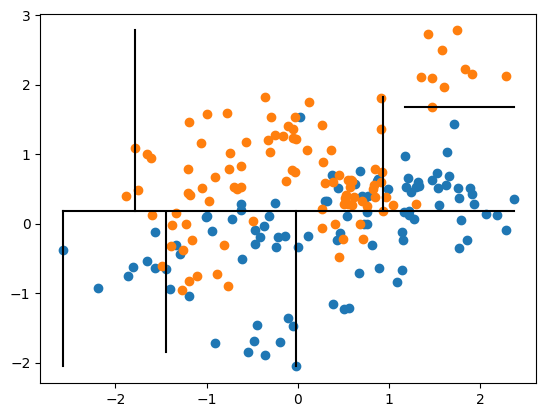

In [169]:

def max_label(y):
    p1 = n1 = 0
    for i in y:
        if i == 1 :
            p1 += 1
        else:
            n1 += 1
    if p1 > n1 :
        return 1
    else:
        return -1
def missclassified(x ,axis , index):
    left_missed = right_missed = 0
    l_max =  max_label(x[:index,2])
    r_max =  max_label(x[index:,2])
# #     print(l_max, r_max)
#     if l_max == r_max:
#         return 0
    for i in range(0 , x.shape[0]):
        if i < index:
            if x[:,2][i] != l_max:
                left_missed += 1
        else:
            if x[:,2][i] != r_max:
                right_missed += 1
#     print(left_missed ,right_missed)
    return left_missed + right_missed
    

def split_data(x):
    global X
    mc_error = 202
    best_axis = 0 
    index = 0 
    for axis in range(0,2):
#         print(axis)
        z = np.argsort(x[:,axis])
        x = x[np.argsort(x[:,axis])]
#         print(x)
        for i in z:
            mc = missclassified(x , axis , i)
#             print(mc)
            if mc < mc_error:
                mc_error = mc
                best_axis = axis
                index = i
#     print(x.shape,best_axis, index,x[index][best_axis])
    if best_axis == 0:
#         print((x[:,1].min() , x[:,1].max()))
#         a = np.full(x[:,1].size , x[index][0])
#         plt.plot(a , x[:,1] , color = 'black')
    
        plt.plot((x[index][0],x[index][0]) , (x[:,1].min() , x[:,1].max()) ,color = 'black')
#         plt.axvline(x = x[index][0],color = 'black')
        
    else:
#         a = np.full(x[:,0].size , x[index][1])
#         plt.plot( x[:,0] ,a , color = 'black')
        print((x[:,0].min(),x[:,0].max()))
        plt.plot((x[:,0].min(),x[:,0].max()) , (x[index][1],x[index][1]) ,color = 'black' )
#         plt.axhline(y=x[index][1],color = 'black')
    return best_axis ,index ,mc_error
training_error = 0
def  tree(x , depth)   :
    global training_error
    if (depth == 0 or x.size <= 30):# minimum 10 points for split
        return
    split_values = split_data(x)
    training_error += split_values[2]
    if split_values[2] == 0 :
        return
    x = x[np.argsort(x[:,split_values[0]])]
#     print(split_values)
    tree(x[:split_values[1],] , depth -1)
    tree(x[split_values[1]:,] , depth -1)
#     print(training_error/200)
X = np.hstack([x,y]) 
# print(X.shape)

tree(X,3)
print("traning error is =",training_error/200)
plt.scatter(x[0:100 , 0] , x[0:100 ,1])
plt.scatter(x1[0:100 , 0] , x1[0:100 ,1])
plt.show()

### 3. Consider the sales of car seats given in Carseats.csv file. The first column Sales is the dependent variable, and the other columns represent the independent variables. Convert the words in the data as follows:

### Good → 1, Medium → 0, Bad → (−1), Yes → 1, No → 0.

### (a) Split the data into training and testing data. The training data must contain 80% of the randomly selected data points, and the remaining data needs to be the test data.

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

carseats =  pd.read_csv("sample_data/Carseats.csv")
carseats.head(5)
replacements = {'Good': 1, 'Medium': 0, 'Bad': -1}
replacements1 = {'Yes':1 , 'No':0}
carseats['ShelveLoc'] = carseats['ShelveLoc'].replace(replacements)
carseats['Urban'] = carseats['Urban'].replace(replacements1)
carseats['US'] = carseats['US'].replace(replacements1)
y = carseats["Sales"]
X = carseats.drop(columns=["Sales"])
# print(X.head(5))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

### (b) Construct a binary tree using regression tree method. Use the command DecisionTreeRegressor from sklearn.tree. Do not use maximum depth. Split the tree until there are 10 points in each node. Do not use pruning. Fit the tree in the training data, and then compute the test error in the test data. Print the constructed tree using plot tree from sklearn.tree, and also print the test error.

Test error: 4.510623821918856


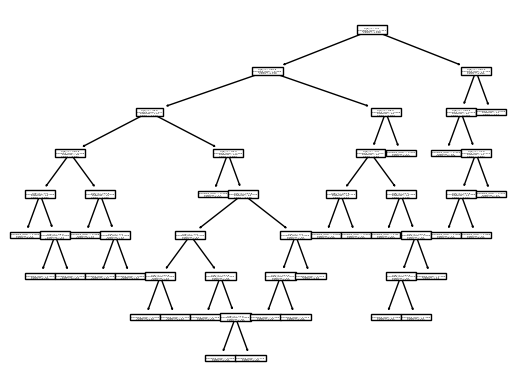

In [171]:
tree = DecisionTreeRegressor(min_samples_leaf=10)
tree.fit(X_train, y_train)
plot_tree(tree)
y_pred = tree.predict(X_test)
test_error = mean_squared_error(y_test, y_pred)
print("Test error:", test_error)

### (c) Perform cost-complexity pruning on the tree constructed in part (b). Choose the required set of α’s using cost complexity pruning path command on the classifier. Pick the value of α that gives the least test error, and then compute the test error in the test data. Print the tree constructed on the test data, and also print the test error.

In [172]:
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
test_errors = []
for ccp_alpha in ccp_alphas:
    pruned_tree = DecisionTreeRegressor(min_samples_leaf=10, ccp_alpha=ccp_alpha)
    pruned_tree.fit(X_train, y_train)
    y_pred = pruned_tree.predict(X_test)
    test_error = np.mean((y_test - y_pred)**2)
    test_errors.append(test_error)

best_ccp_alpha = ccp_alphas[np.argmin(test_errors)]
print(f"Best ccp_alpha: {best_ccp_alpha:.4f}")


pruned_tree = DecisionTreeRegressor(min_samples_leaf=10, ccp_alpha=best_ccp_alpha)
pruned_tree.fit(X_train, y_train)

y_pred = pruned_tree.predict(X_test)
test_error = np.mean((y_test - y_pred)**2)
print(f"Test error (pruned tree): {test_error:.4f}")

Best ccp_alpha: 0.0207
Test error (pruned tree): 4.4951


### (d) Build a random forest using the command RandomForestRegressor from sklearn.ensemble. Choose one-fourth of the training data at random, and choose four of the ten available parameters in the data set. Print the test error.

In [173]:
from sklearn.ensemble import RandomForestRegressor



train_idx = np.random.choice(X_train.index, size=int(len(X_train)/4), replace=False)
params = ['Price', 'Age', 'US', 'Urban']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train.loc[train_idx, params], y_train[train_idx])
y_pred = rf.predict(X_test.loc[:, params])
mse = mean_squared_error(y_test, y_pred)
print("Test error (MSE): {:.3f}".format(mse))

Test error (MSE): 7.567
